In [82]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [83]:
geo_cff = gpd.read_file('openinghours-shops/openinghours-shops.shp', encoding = "UTF-8")
didok = pd.read_csv("station-didok.csv", error_bad_lines = False, sep = ";", dtype={'didok85': float})
pf = pd.read_csv("passenger-frequence.csv", sep=";")

In [84]:
merged = geo_cff.merge(
    didok[['Name', 'didok85', 'means of transport']], 
    left_on="didok", 
    right_on="didok85")

In [85]:
merged[:3]

,bahnhofsnam,didok,businee_nam,standortdet,geschoss,offnungszei,kategorie,unterkatego,beschreibun,sbb_webseit,mail_adress,telefon,webseite,bilder,logo,schlagworte,zahlungsmit,gultig_ab,gultig_bis,lod,geometry,Name,didok85,means of transport
0,,8501609.0,Gepäckaufgabe,,Stadtebene,,SBB,,,,,,,,,Koffer|Versand|Ferien|Aufgabe|Gepäck,,,,http://lod.opentransportdata.swiss/didok/8501609,POINT (7.9884074736364 46.319362820281),Brig,8501609.0,Zug
1,,8501609.0,Sektor B,,Stadtebene,,SBB,,,,,,,,,,,,,http://lod.opentransportdata.swiss/didok/8501609,POINT (7.9871075350206 46.319016519095),Brig,8501609.0,Zug
2,,8501609.0,Shopping,,Stadtebene,,SBB,,,,,,,,,,,,,http://lod.opentransportdata.swiss/didok/8501609,POINT (7.9880493406051 46.319385038627),Brig,8501609.0,Zug


In [86]:
merged["kategorie"].value_counts()

SBB                         729
Öffentlicher Verkehr        594
Shopping                    461
Restaurants & Take Aways    227
Kombinierte Mobilität       131
Services IM                  80
Büros & Praxen               67
Services P                   55
Services-Übrige              42
Name: kategorie, dtype: int64

In [87]:
merged["unterkatego"].value_counts()

                                                                1439
Dienstleistungen                                                 264
Restaurants / Take-Away                                          219
Lebensmittel / Getränke                                          120
Gesundheit / Körperpflege                                         75
Kioske / Tabakwaren                                               70
Bekleidung                                                        42
Elektronik / Foto / Musik                                         24
Blumen                                                            22
Bücher / Papeterie / Bilder                                       19
Schmuck / Uhren / Optik                                           16
SBB Services                                                      14
Schuhe / Reiseartikel / Lederwaren                                13
Bücher / Papeterie / Bilder|Kioske / Tabakwaren                   13
Geschenkartikel / Haus / Garten   

In [88]:
rest = geo_cff[geo_cff['kategorie'] == "Restaurants & Take Aways"]

rest['businee_nam'].value_counts()

Brezelkönig                                31
Caffè Spettacolo                           11
Starbucks Coffee                            8
Burger King                                 6
Avec.                                       5
Coop to go                                  4
Suan Long                                   4
Yooji's Sushi Deli                          4
Le Prêt-à-manger                            3
Scent of Bamboo                             3
Superguud                                   3
Nordsee                                     3
Il Baretto                                  3
McDonald's                                  3
Migros Take Away                            3
Blueberry American Bakery                   3
Aperto                                      2
Hitzberger                                  2
Upper Crust                                 2
A. Pougnier                                 2
Zenhäusern - Laden, Restaurant und Shop     2
Holy Cow                          

In [89]:
shop = geo_cff[geo_cff['kategorie'] == "Shopping"]

shop['businee_nam'].value_counts()

K Kiosk                                            65
Press & Books                                      13
Coop                                               11
Coop Pronto                                        10
Confiserie Sprüngli                                 9
Lolipop - the Candy Shop                            8
Chicorée                                            8
Drinks of the World                                 8
Migros                                              8
5àSec                                               7
Blume 3000                                          7
Orell Füssli                                        6
Amavita Apotheke                                    6
Läderach Chocolatier Suisse                         6
Swisscom                                            5
Sun Store Pharmacie                                 5
Salt.                                               5
Gidor Coiffure                                      4
Inside Africa               

In [91]:
# Virer les sans catégories

df = (merged[merged['kategorie'] != ""]
      .groupby("Name")['kategorie']
      .value_counts() ## for counts
      .reset_index(name="count"))

In [92]:
df.head()

,Name,kategorie,count
0,Aarau,SBB,38
1,Aarau,Öffentlicher Verkehr,34
2,Aarau,Shopping,16
3,Aarau,Kombinierte Mobilität,4
4,Aarau,Restaurants & Take Aways,4


In [93]:
df = df.pivot(index = "Name", columns = "kategorie", values = "count")
df.head()

kategorie,Büros & Praxen,Kombinierte Mobilität,Restaurants & Take Aways,SBB,Services IM,Services P,Services-Übrige,Shopping,Öffentlicher Verkehr
Name,,,,,,,,,
Aarau,NaN,4.0,4.0,38.0,NaN,2.0,2.0,16.0,34.0
Baden,NaN,4.0,4.0,NaN,NaN,2.0,2.0,2.0,NaN
Basel SBB,5.0,7.0,6.0,49.0,7.0,2.0,1.0,28.0,36.0
Bellinzona,2.0,3.0,3.0,40.0,3.0,2.0,1.0,3.0,18.0
Bern,4.0,9.0,20.0,46.0,9.0,2.0,4.0,55.0,43.0


In [94]:
df.fillna(0, inplace = True)

In [95]:
df.reset_index(inplace = True ) # pour modifier la nouvelle df

# Formule math pour calculer les ressemblances

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
names = df['Name']

In [98]:
cols = list(df.columns.values) ## supprimer la colonne des Noms (strings)
cols = cols[1:]

In [99]:
features_df = df[cols]

In [100]:
similarity = cosine_similarity(features_df)
similarity_df = pd.DataFrame(similarity, columns = names, index = names) # on remet les noms de ville

In [101]:
similarity_df["Lausanne"].sort_values(ascending = False)

Name
Lausanne              1.000000
Yverdon-les-Bains     0.979130
Zürich Enge           0.977245
St. Gallen            0.933848
Wil                   0.928085
Zürich Stadelhofen    0.904094
Visp                  0.849644
Uster                 0.843925
Zürich HB             0.837187
Thun                  0.837158
Sion                  0.789045
Delémont              0.776297
Solothurn             0.688530
Baden                 0.674200
Bern                  0.670836
Luzern                0.594382
Genève                0.532257
Basel SBB             0.417767
Genève-Aéroport       0.391065
Winterthur            0.339716
Zürich Oerlikon       0.334291
Aarau                 0.296400
Neuchâtel             0.279108
Chur                  0.270633
Locarno               0.266335
Fribourg/Freiburg     0.253446
Montreux              0.250347
Schaffhausen          0.185723
Olten                 0.184511
Zug                   0.180707
Lugano                0.156556
Biel/Bienne           0.152418
Bel

In [102]:
import seaborn as sns
%matplotlib inline

In [103]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["pdf.fonttype"] = 42

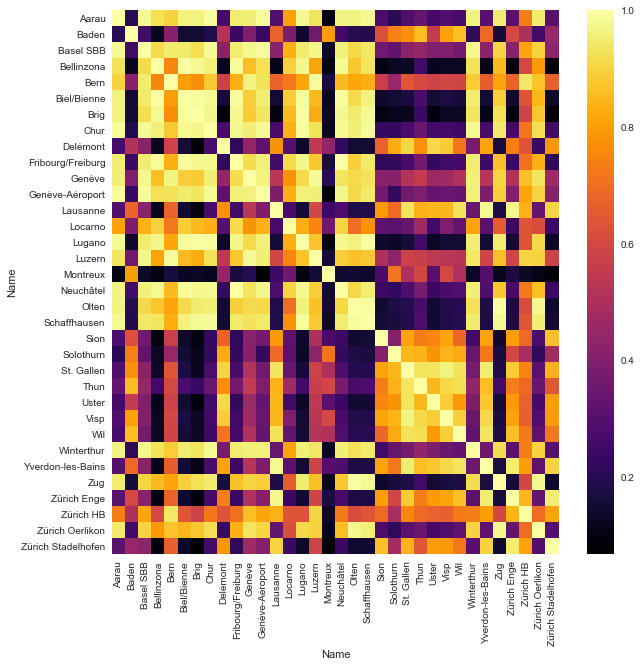

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(similarity_df, cmap = "inferno")
#plt.savefig("graphique_gare3.pdf")

# Faire des groupes de gares qui se ressemblent

In [105]:
from sklearn.cluster import KMeans

# basé sur l'écart à la moyenne

In [106]:
km = KMeans(n_clusters = 3)
km.fit(features_df)
df["groupes"] = km.labels_

In [107]:
df = df.sort_values("groupes")

In [108]:
df['groupes'].value_counts()

0    18
1    15
2     1
Name: groupes, dtype: int64

In [109]:
df[df["groupes"] == 0]['Name']

0                 Aarau
19         Schaffhausen
18                Olten
17            Neuchâtel
32      Zürich Oerlikon
15               Luzern
14               Lugano
27           Winterthur
10               Genève
11      Genève-Aéroport
29                  Zug
7                  Chur
6                  Brig
5           Biel/Bienne
4                  Bern
3            Bellinzona
2             Basel SBB
9     Fribourg/Freiburg
Name: Name, dtype: object

In [110]:
df[df["groupes"] == 1]['Name']

25                  Visp
28     Yverdon-les-Bains
30           Zürich Enge
26                   Wil
24                 Uster
16              Montreux
22            St. Gallen
21             Solothurn
20                  Sion
13               Locarno
12              Lausanne
8               Delémont
1                  Baden
23                  Thun
33    Zürich Stadelhofen
Name: Name, dtype: object

In [111]:
df[df["groupes"] == 2]['Name']

31    Zürich HB
Name: Name, dtype: object